<a href="https://colab.research.google.com/github/PaoloProdossimoLopes/python-machine-learning-personality-grouping-study/blob/main/personality_test_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from io import open
pd.options.display.max_columns = 150

Carregando a base de dados

In [34]:
data = pd.read_csv('data-final.csv', sep='\t')

Vizualizando o header da base de dados

In [35]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,EXT1_E,EXT2_E,EXT3_E,EXT4_E,EXT5_E,EXT6_E,EXT7_E,EXT8_E,EXT9_E,EXT10_E,EST1_E,EST2_E,EST3_E,EST4_E,EST5_E,EST6_E,EST7_E,EST8_E,EST9_E,EST10_E,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,9419.00,5491.00,3959.00,4821.00,5611.00,2756.00,2388.00,2113.00,5900.00,4110.00,6135.00,4150.00,5739.00,6364.00,3663.00,5070.00,5709.00,4285.00,2587.00,3997.00,4750.00,5475.00,11641.00,3115.00,3207.00,3260.00,10235.00,5897.00,1758.00,3081.00,6602.00,5457.00,1569.00,2129.00,3762.00,4420.00,9382.00,5286.00,4983.00,6339.00,3146.00,4067.00,2959.00,3411.00,2170.00,4920.00,4436.00,3116.00,2992.00,4354.00,2016-03-03 02:01:01,768.00,1024.00,9.00,234.00,6.00,1.00,GB,51.5448,0.1991
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,7235.00,3598.00,3315.00,2564.00,2976.00,3050.00,4787.00,3228.00,3465.00,3309.00,9036.00,2406.00,3484.00,3359.00,3061.00,2539.00,4226.00,2962.00,1799.00,1607.00,2158.00,2090.00,2143.00,2807.00,3422.00,5324.00,4494.00,3627.00,1850.00,1747.00,5163.00,5240.00,7208.00,2783.00,4103.00,3431.00,3347.00,2399.00,3360.00,5595.00,2624.00,4985.00,1684.00,3026.00,4742.00,3336.00,2718.00,3374.00,3096.00,3019.00,2016-03-03 02:01:20,1360.00,768.00,12.00,179.00,11.00,1.00,MY,3.1698,101.706
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,4657.00,3549.00,2543.00,3335.00,5847.00,2540.00,4922.00,3142.00,14621.00,2191.00,5128.00,3675.00,3442.00,4546.00,8275.00,2185.00,2164.00,1175.00,3813.00,1593.00,1089.00,2203.00,3386.00,1464.00,2562.00,1493.00,3067.00,13719.00,3892.00,4100.00,4286.00,4775.00,2713.00,2813.00,4237.00,6308.00,2690.00,1516.00,2379.00,2983.00,1930.00,1470.00,1644.00,1683.00,2229.00,8114.00,2043.00,6295.00,1585.00,2529.00,2016-03-03 02:01:56,1366.00,768.00,3.00,186.00,7.00,1.00,GB,54.9119,-1.3833
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,3996.00,2896.00,5096.00,4240.00,5168.00,5456.00,4360.00,4496.00,5240.00,4000.00,3736.00,4616.00,3015.00,2711.00,3960.00,4064.00,4208.00,2936.00,7336.00,3896.00,6062.00,11952.00,1040.00,2264.00,3664.00,3049.00,4912.00,7545.00,4632.00,6896.00,2824.00,520.00,2368.00,3225.00,2848.00,6264.00,3760.00,10472.00,3192.00,7704.00,3456.00,6665.00,1977.00,3728.00,4128.00,3776.00,2984.00,4192.00,3480.00,3257.00,2016-03-03 02:02:02,1920.00,1200.00,186.00,219.00,7.00,1.00,GB,51.75,-1.25
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,6004.00,3965.00,2721.00,3706.00,2968.00,2426.00,7339.00,3302.00,16819.00,3731.00,4740.00,2856.00,7461.00,217

Iremos agora exlcuir alguns dados, isso pq temos algumas informaçoes irrelevantes. Como temos 50 questoes ( como informa a descriçao do Keggle ) podemos excluit apartir da coluna 50 ate a 110 que é o total

In [36]:
data.drop(data.columns[50:], axis=1, inplace=True) #Removera da 50 em diante
#data.drop(data.columns[50:110], axis=1, inplace=True) 

Verificando para validar que foi feito corretamente ...

In [37]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00


Para uma mehor visualizaçao dos numeros irei formatar cada numero da tabela para o tipo float com duas cassas decimais

In [38]:
pd.options.display.float_format = '{:.2f}'.format

Usando o describe irei obter algumas informaçoes de valores medios e estatisticos sobre a base de dado total

In [39]:
data.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539452.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00,539451.00
mean,2.65,2.79,3.29,3.15,3.27,2.45,2.78,3.42,2.96,3.56,3.28,3.19,3.85,2.68,2.85,2.86,3.06,2.69,3.10,2.76,2.30,3.81,2.28,3.92,2.28,3.75,2.21,3.68,3.78,3.58,3.27,2.92,3.97,2.64,2.63,2.84,3.68,2.49,3.18,3.57,3.61,2.14,3.99,2.07,3.76,1.91,3.95,3.12,4.07,3.92
std,1.26,1.33,1.22,1.24,1.28,1.24,1.40,1.28,1.35,1.31,1.35,1.23,1.16,1.25,1.28,1.33,1.29,1.34,1.30,1.32,1.36,1.15,1.29,1.13,1.18,1.23,1.13,1.10,1.16,1.08,1.18,1.38,1.05,1.25,1.28,1.42,1.14,1.14,1.28,1.05,1.16,1.12,1.10,1.10,1.00,1.12,1.02,1.25,1.06,1.04
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,2.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,3.00,3.00,2.00,2.00,3.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00,3.00,1.00,3.00,1.00,3.00,1.00,3.00,2.00,4.00,3.00
50%,3.00,3.00,3.00,3.00,3.00,2.00,3.00,4.00,3.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,3.00,3.00,4.00,3.00,3.00,4.00,4.00,2.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,4.00
75%,4.00,4.00,4.00,4.00,4.00,3.00,4.00,5.00,4.00,5.00,4.00,4.00,5.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,3.00,5.00,3.00,5.00,3.00,5.00,3.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,3.00,4.00,4.00,5.00,3.00,5.00,3.00,4.00,2.00,5.00,4.00,5.00,5.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


Informaçoes obtidas pelo describe:
  - Possuimos um ruido (erro) ja que as notas vao de 1-5 mas o valor minimo descrito é 0.

Vamos Entao identificar a quantidade de registros com valor 0

In [40]:
data['EXT1'].value_counts()

3.00    159557
1.00    132861
2.00    101587
4.00     99975
5.00     43348
0.00      2124
Name: EXT1, dtype: int64

POdemos observar a quantidade de valores para cada nota atribuida, Descobrindo assim que temos 347 notas 0 (zero) ou seja 347 ruidos.

Vamos primeiros exibir as infos que foram atribuidas como zero antes de remove-los

In [41]:
# infos_com_valores_zero = (data == 0.00).all(axis=1) 
infos_com_valores_zero = (data == 0.00).all(axis=1)
ruidos = data[infos_com_valores_zero]
ruidos.describe()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
count,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00,1193.00
mean,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
std,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Agora que ja vimos os dados zerados, podemos retira-los

In [42]:
condition = ((data > 0.00).all(axis=1))
data = data[condition]
#Agora vamos ver se realemnte nos livramos dos ruidos ...
data.EXT1.value_counts()

3.00    135158
1.00    113742
2.00     88785
4.00     85898
5.00     35387
Name: EXT1, dtype: int64

Agora nos certificamos que nao temos mais os ruidos gerados pelas notas zeros (0)



Agora Precisaremos definir o numero de Clusters, ou seja definir/ agrupar os semelhantes

Mas para isso precisaremos de um ML nao supervisionado, nos nao temos uma classe e sim um grupo para ser agrupado

iremos trabalhar com a tecnica de agrupamento de dados, e uma das perguntas mais inportantes é 'Qual a quantidade de agrupamentos iremos trabalhar?'

isso é uma otima discussao, esse numero varia dependendo do problema, o ideal é conhecer a regra de negocio e suas caracteristicas para saber como analisar adequadamente. Para essa pesquisa baseada no OCEAN que sao 5 tipos de compormantos iremos agrupar as informaçoes de acordo com esses grupos (poderia ser agrupado de forma diferente, porem essa seria a maneira mais adequada).

OBS: A discussao da quantidade de clusters como ja foi dita é extensa e exitem metodos que podem nos direcionar para um numero adequado de acordo com a variabilidade dos dados. Irei rodar os metodos para isso so para fins de estudo

In [43]:
#Metodo Euba para definir a quantidade aproxima de clusters adequados 
!pip install yellowbrick

In [44]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [45]:
kmeans = KMeans()
vizualizer = KElbowVisualizer(kmeans, k=(2,10)) #O k, ira indicar a quantidade de testes de agrupamento que o vizualizador ira tentar agrupar para esse caso sera com 2, 3, 4 .... 10 clousters

como seria contra produtivo gerar a analise com todos os dados do banco ja que temos mais de 1M de informaçoes e custaria muito tempo, vamos pegar apenas algumas informacoes de maneira aleatoria

In [46]:
data_sample = data.sample(n=5000, random_state=1)

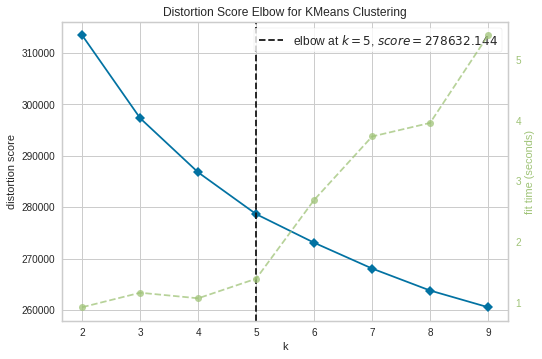

In [47]:
# Entao vamos apresentar essas informaçoes:
vizualizer.fit(data_sample)
vizualizer.poof()

O teste nos apontou que de fato o ideal e agrupar em 5 grupos (podemos ver isso pelo K indicado no canti superios direito do grafico

Vamos entao agora fazer o nosso agrupamento com os 5 grupos

In [48]:
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

In [49]:
predicoes = k_fit.labels_
data['Clusters'] = predicoes

In [50]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.00,1.00,5.00,2.00,5.00,1.00,5.00,2.00,4.00,1.00,1.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,5.00,2.00,4.00,2.00,3.00,2.00,4.00,3.00,4.00,3.00,4.00,3.00,2.00,2.00,4.00,4.00,2.00,4.00,4.00,5.00,1.00,4.00,1.00,4.00,1.00,5.00,3.00,4.00,5.00,1
1,3.00,5.00,3.00,4.00,3.00,3.00,2.00,5.00,1.00,5.00,2.00,3.00,4.00,1.00,3.00,1.00,2.00,1.00,3.00,1.00,1.00,4.00,1.00,5.00,1.00,5.00,3.00,4.00,5.00,3.00,3.00,2.00,5.00,3.00,3.00,1.00,3.00,3.00,5.00,3.00,1.00,2.00,4.00,2.00,3.00,1.00,4.00,2.00,5.00,3.00,2
2,2.00,3.00,4.00,4.00,3.00,2.00,1.00,3.00,2.00,5.00,4.00,4.00,4.00,2.00,2.00,2.00,2.00,2.00,1.00,3.00,1.00,4.00,1.00,4.00,2.00,4.00,1.00,4.00,4.00,3.00,4.00,2.00,2.00,2.00,3.00,3.00,4.00,2.00,4.00,2.00,5.00,1.00,2.00,1.00,4.00,2.00,5.00,3.00,4.00,4.00,2
3,2.00,2.00,2.00,3.00,4.00,2.00,2.00,4.00,1.00,4.00,3.00,3.00,3.00,2.00,3.00,2.00,2.00,2.00,4.00,3.00,2.00,4.00,3.00,4.00,2.00,4.00,2.00,4.00,3.00,4.00,2.00,4.00,4.00,4.00,1.00,2.00,2.00,3.00,1.00,4.00,4.00,2.00,5.00,2.00,3.00,1.00,4.00,4.00,3.00,3.00,0
4,3.00,3.00,3.00,3.00,5.00,3.00,3.00,5.00,3.00,4.00,1.00,5.00,5.00,3.00,1.00,1.00,1.00,1.00,3.00,2.00,1.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,5.00,3.00,5.00,1.00,5.00,1.00,3.00,1.00,5.00,1.00,5.00,5.00,5.00,1.00,5.00,1.00,5.00,1.00,5.00,3.00,5.00,5.00,1


podemos observar que apareceram alguns ruidos, entao vamos retiralos

Agora vamos analisar os grupos

In [51]:
data['Clusters'].value_counts()

4    103515
2     94648
1     94018
3     90661
0     76128
Name: Clusters, dtype: int64

In [52]:
#vamos calcular a media de cada grupo de respostas
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

In [56]:
data_soma = pd.DataFrame()
#criando as colunas do OCEAN
data_soma['Extroversions'] = (data[ext].sum(axis=1)/10)
data_soma['Neurotic'] = (data[est].sum(axis=1)/10)
data_soma['Agreeable'] = (data[agr].sum(axis=1)/10)
data_soma['Concientuous'] = (data[csn].sum(axis=1)/10)
data_soma['Open'] = (data[opn].sum(axis=1)/10)
data_soma['Clusters'] = predicoes

In [60]:
#Exibindo o valor medio por grupo
data_soma.groupby('Clusters').mean()

,Extroversions,Neurotic,Agreeable,Concientuous,Open
Clusters,,,,,
0,3.01,2.67,2.96,3.02,3.23
1,3.10,2.43,3.22,3.12,3.33
2,3.07,2.97,3.19,3.16,3.23
3,2.98,3.68,3.16,3.18,3.25
4,3.09,3.44,3.31,3.23,3.36


In [61]:
#armazenando a media
data_media = data_soma.groupby('Clusters').mean()

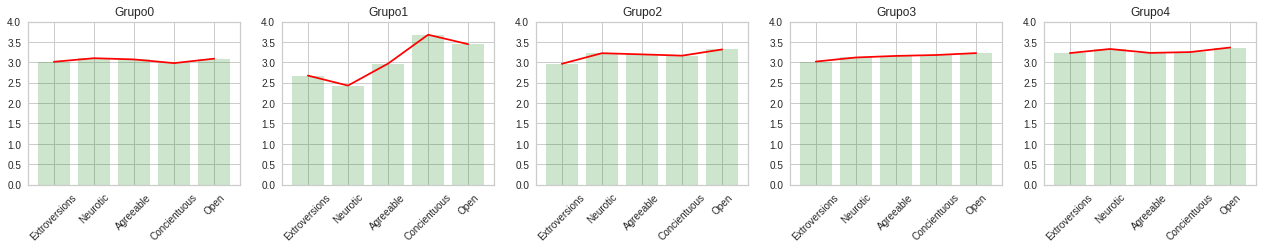

In [68]:
#vamos plotar o graficom com essa medias
plt.figure(figsize=(22, 3))
for i in range(0, 5):
  plt.subplot(1, 5, i+1)
  plt.bar(data_media.columns, data_media.iloc[:, i], color='green', alpha=0.2)
  plt.plot(data_media.columns, data_media.iloc[:, i], color='red')
  plt.title('Grupo' + str(i))
  plt.xticks(rotation=45)
  plt.ylim(0,4)

Vamos criar uma interface visual para tornar mais intuitivo o teste

In [70]:
!pip install gradio

     |████████████████████████████████| 668 kB 14.9 MB/s 
     |████████████████████████████████| 84 kB 2.8 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 255 kB 53.9 MB/s 
     |████████████████████████████████| 2.0 MB 30.2 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
     |████████████████████████████████| 1.1 MB 47.7 MB/s 
     |████████████████████████████████| 211 kB 49.7 MB/s 
     |████████████████████████████████| 271 kB 58.1 MB/s 
     |████████████████████████████████| 144 kB 57.5 MB/s 
     |████████████████████████████████| 94 kB 3.3 MB/s 
     |████████████████████████████████| 10.9 MB 39.2 MB/s 
     |████████████████████████████████| 58 kB 4.6 MB/s 
     |████████████████████████████████| 79 kB 6.6 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 3.6 MB 42.9 MB/s 
     |████████████████████████████████| 61 kB 403 kB/s 
     |███████████████████████

In [72]:
dic_questoes = open('docs.txt').read().split('\n')

In [73]:
dic_questoes

['EXT1\tI am the life of the party.',
 "EXT2\tI don't talk a lot.",
 'EXT3\tI feel comfortable around people.',
 'EXT4\tI keep in the background.',
 'EXT5\tI start conversations.',
 'EXT6\tI have little to say.',
 'EXT7\tI talk to a lot of different people at parties.',
 "EXT8\tI don't like to draw attention to myself.",
 "EXT9\tI don't mind being the center of attention.",
 'EXT10\tI am quiet around strangers.',
 'EST1\tI get stressed out easily.',
 'EST2\tI am relaxed most of the time.',
 'EST3\tI worry about things.',
 'EST4\tI seldom feel blue.',
 'EST5\tI am easily disturbed.',
 'EST6\tI get upset easily.',
 'EST7\tI change my mood a lot.',
 'EST8\tI have frequent mood swings.',
 'EST9\tI get irritated easily.',
 'EST10\tI often feel blue.',
 'AGR1\tI feel little concern for others.',
 'AGR2\tI am interested in people.',
 'AGR3\tI insult people.',
 "AGR4\tI sympathize with others' feelings.",
 "AGR5\tI am not interested in other people's problems.",
 'AGR6\tI have a soft heart.',


In [77]:
questions = []
for question in dic_questoes:
  q = str(question)
  index_do_t_na_linha = question.find('\t')
  frase_apartir_do_ponto = question[index_do_t_na_linha : ]
  info_com_vazios_removidos = frase_apartir_do_ponto.lstrip()
  questions.append(info_com_vazios_removidos)

#Agora vamos ver como ficou
questions

['I am the life of the party.',
 "I don't talk a lot.",
 'I feel comfortable around people.',
 'I keep in the background.',
 'I start conversations.',
 'I have little to say.',
 'I talk to a lot of different people at parties.',
 "I don't like to draw attention to myself.",
 "I don't mind being the center of attention.",
 'I am quiet around strangers.',
 'I get stressed out easily.',
 'I am relaxed most of the time.',
 'I worry about things.',
 'I seldom feel blue.',
 'I am easily disturbed.',
 'I get upset easily.',
 'I change my mood a lot.',
 'I have frequent mood swings.',
 'I get irritated easily.',
 'I often feel blue.',
 'I feel little concern for others.',
 'I am interested in people.',
 'I insult people.',
 "I sympathize with others' feelings.",
 "I am not interested in other people's problems.",
 'I have a soft heart.',
 'I am not really interested in others.',
 'I take time out for others.',
 "I feel others' emotions.",
 'I make people feel at ease.',
 'I am always prepared.

In [80]:
import gradio as gr
input_questions = []
for q in questions:
  obj_input = gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q)
  input_questions.append(obj_input)

input_questions

[Slider(label="I am the life of the party."),
 Slider(label="I don't talk a lot."),
 Slider(label="I feel comfortable around people."),
 Slider(label="I keep in the background."),
 Slider(label="I start conversations."),
 Slider(label="I have little to say."),
 Slider(label="I talk to a lot of different people at parties."),
 Slider(label="I don't like to draw attention to myself."),
 Slider(label="I don't mind being the center of attention."),
 Slider(label="I am quiet around strangers."),
 Slider(label="I get stressed out easily."),
 Slider(label="I am relaxed most of the time."),
 Slider(label="I worry about things."),
 Slider(label="I seldom feel blue."),
 Slider(label="I am easily disturbed."),
 Slider(label="I get upset easily."),
 Slider(label="I change my mood a lot."),
 Slider(label="I have frequent mood swings."),
 Slider(label="I get irritated easily."),
 Slider(label="I often feel blue."),
 Slider(label="I feel little concern for others."),
 Slider(label="I am interested in

In [90]:
def predict(*outputs_questions):
  outputs_questions = np.array(outputs_questions).reshape(1, -1)
  return 'Você pertence ao grupo: ' + str(k_fit.predict(outputs_questions))

iface = gr.Interface(
    fn = predict,
    title = "Big five personality",
    description = "Sistema para datecçao de traços de persobalidades.",
    inputs = input_questions,
    outputs = "text"
)

iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://54460.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<fastapi.applications.FastAPI at 0x7f07b2feaad0>,
 'http://127.0.0.1:7865/',
 'https://54460.gradio.app')